In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
from torch.utils.tensorboard import SummaryWriter
import NNModel

In [2]:
# Writer will output to ./runs/ directory by default
writer = SummaryWriter('runs/fashion_mnist_exp1')

<class 'torch.utils.data.dataloader.DataLoader'>
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

Dataset FashionMNIST Image Samples:


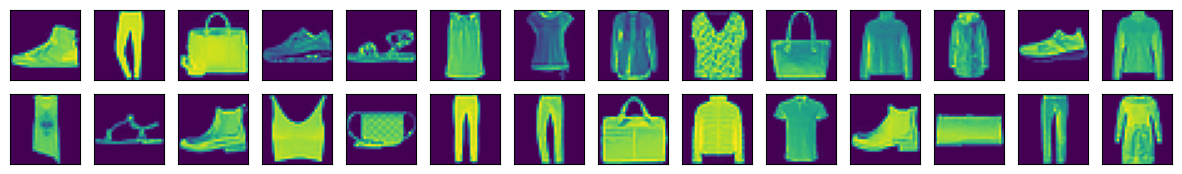

Each training and test sample is assigned to one of the ten following labels:

T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot


-------------<Build Nueral Network Model>-------------

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): LeakyReLU(negative_slope=0.03)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): LeakyReLU(negative_slope=0.03)
  (5): Linear(in_features=256, out_features=10, bias=True)
)

-------------<Train Neural Network Model>-------------

Epoch [1/10], Loss: 0.0286, Accuracy: 83.21%
Epoch [2/10], Loss: 0.0222, Accuracy: 86.87%
Epoch [3/10], Loss: 0.0201, Accuracy: 87.86%
Epoch [4/10], Loss: 0.0186, Accuracy: 88.87%
Epoch [5/10], Loss: 0.0175, Accuracy: 89.43%
Epoch [6/10], Loss: 0.0169, Accuracy: 89.86%
Epoch [7/10], Loss: 0.0159, Accuracy: 90.46%
Epoch [8/10], Loss: 0.0154, Accuracy: 90.81%
Epoch [9/10], Loss: 0.0147, Accuracy: 91.16%
Epoch [10/10], L

In [3]:
training_epoch = 10
criterion = nn.CrossEntropyLoss()
train_loader = NNModel.getTrainingDataLoader()
print(type(train_loader))
print(train_loader.dataset)
    
print()
NNModel.getDataImageSamples()
    
test_loader = NNModel.getTestDataLoader()  
model = NNModel.buildModel()
    
print('\n-------------<Build Nueral Network Model>-------------\n')
print(model)
    
print('\n-------------<Train Neural Network Model>-------------\n')
NNModel.trainModel(model, train_loader, criterion, training_epoch, writer)
writer.close()

In [4]:
print('\n---------------<Evaluate Newwork Model>---------------\n')
NNModel.evaluateModel(model, test_loader, criterion, writer)


---------------<Evaluate Newwork Model>---------------

Test Accuracy : 87.23%  Loss: 0.4541



-----------------<Predict the Labels>-----------------



Test Sample 1 :


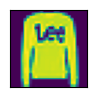

Top three most likely class labels
Pullover: 99.99%
Coat: 0.01%
Shirt: 0.00%


Test Sample 2 :


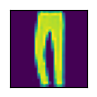

Top three most likely class labels
Trouser: 100.00%
Coat: 0.00%
Dress: 0.00%


Test Sample 3 :


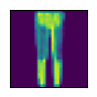

Top three most likely class labels
Trouser: 100.00%
Dress: 0.00%
Coat: 0.00%


Test Sample 4 :


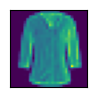

Top three most likely class labels
Shirt: 72.05%
T-shirt/top: 23.58%
Pullover: 4.25%


Test Sample 5 :


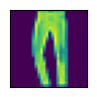

Top three most likely class labels
Trouser: 100.00%
Coat: 0.00%
Dress: 0.00%


Test Sample 6 :


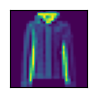

Top three most likely class labels
Coat: 100.00%
Pullover: 0.00%
Shirt: 0.00%


Test Sample 7 :


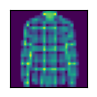

Top three most likely class labels
Shirt: 99.96%
Pullover: 0.03%
Coat: 0.01%


Test Sample 8 :


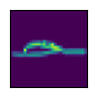

Top three most likely class labels
Sandal: 100.00%
Pullover: 0.00%
Ankle Boot: 0.00%


Test Sample 9 :


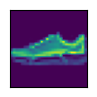

Top three most likely class labels
Sneaker: 100.00%
Sandal: 0.00%
Ankle Boot: 0.00%


In [5]:
print('\n-----------------<Predict the Labels>-----------------\n')
pred_set, _ = next(iter(test_loader))
NNModel.predictLabel(model, pred_set, 1)
NNModel.predictLabel(model, pred_set, 2)
NNModel.predictLabel(model, pred_set, 3)
NNModel.predictLabel(model, pred_set, 4)
NNModel.predictLabel(model, pred_set, 5)
NNModel.predictLabel(model, pred_set, 6)
NNModel.predictLabel(model, pred_set, 7)
NNModel.predictLabel(model, pred_set, 8)
NNModel.predictLabel(model, pred_set, 9)